In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#exploratory data analysis

<Axes: >

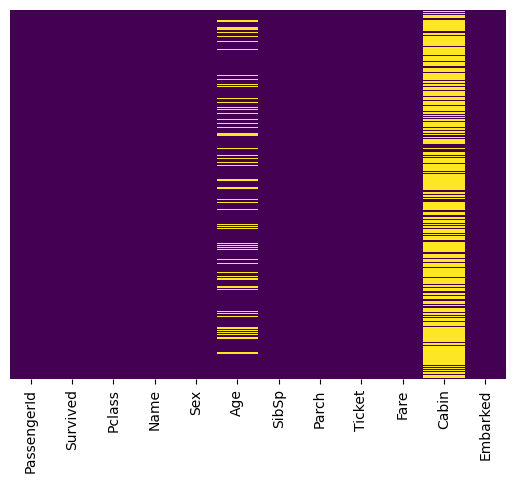

In [5]:
sns.heatmap(df.isnull(),yticklabels= False,cbar = False,cmap= 'viridis')

In [6]:
#there are null values in cabin and age columns

<Axes: xlabel='Survived', ylabel='count'>

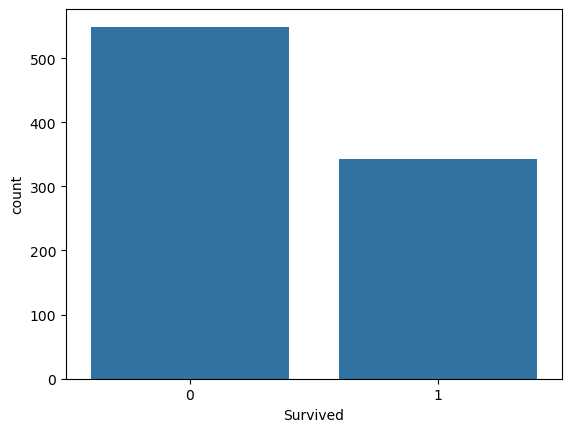

In [7]:
sns.countplot(x = 'Survived',data = df)

<Axes: xlabel='Survived', ylabel='count'>

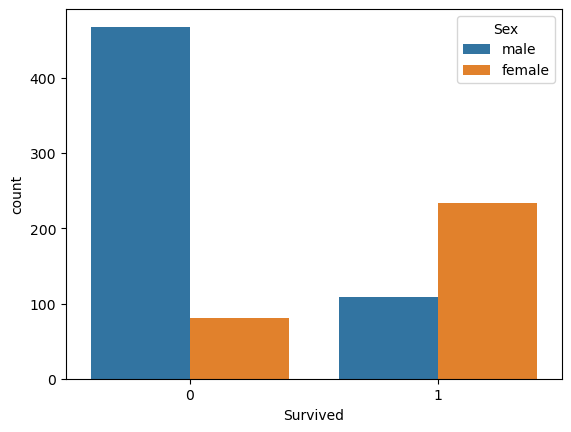

In [8]:
sns.countplot(x ='Survived',hue = 'Sex', data = df)

In [9]:
df['Pclass'].unique()

array([3, 1, 2])

<Axes: xlabel='Survived', ylabel='count'>

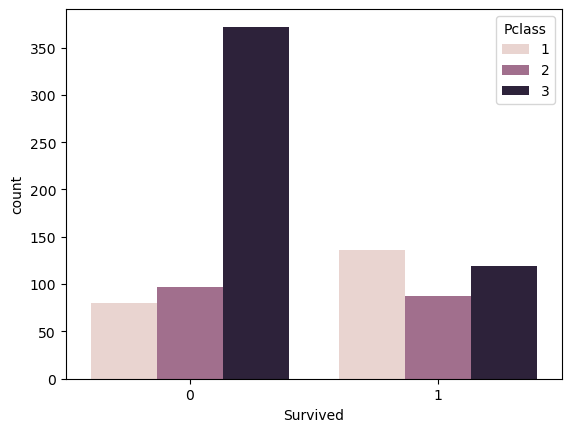

In [10]:
sns.countplot(x = 'Survived',hue = 'Pclass',data = df)

/var/folders/kt/w6twmgs133zbbhs2_ktq4jc80000gn/T/ipykernel_1593/2883969337.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(),bins = 30,kde = False)


<Axes: xlabel='Age'>

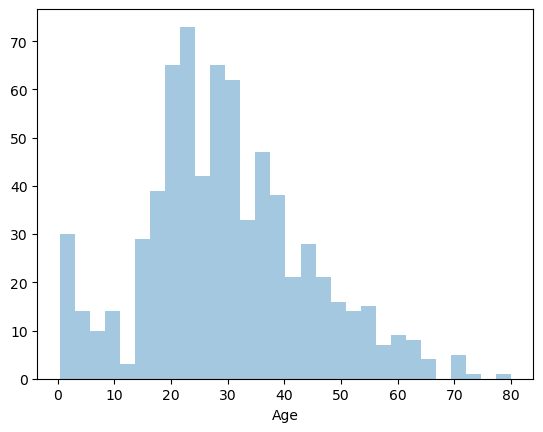

In [11]:
sns.distplot(df['Age'].dropna(),bins = 30,kde = False)

<Axes: xlabel='SibSp', ylabel='count'>

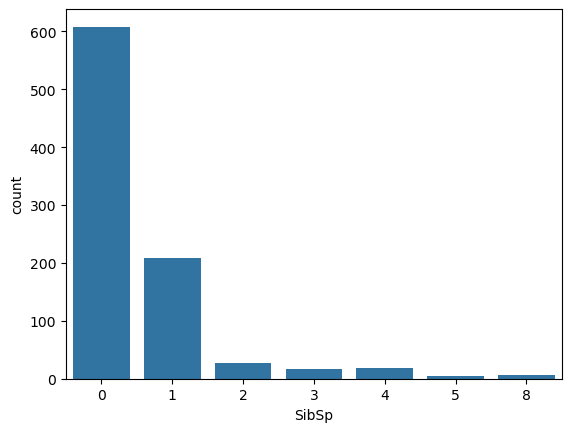

In [12]:
sns.countplot(x = 'SibSp',data = df)

<Axes: >

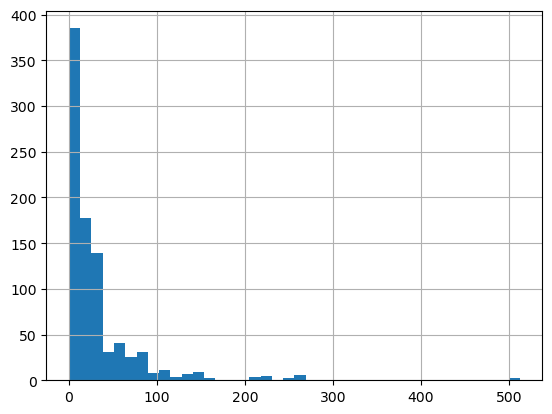

In [13]:
df['Fare'].hist(bins = 40)

In [14]:
#data cleaning

In [15]:
#filling missing values

<Axes: xlabel='Pclass', ylabel='Age'>

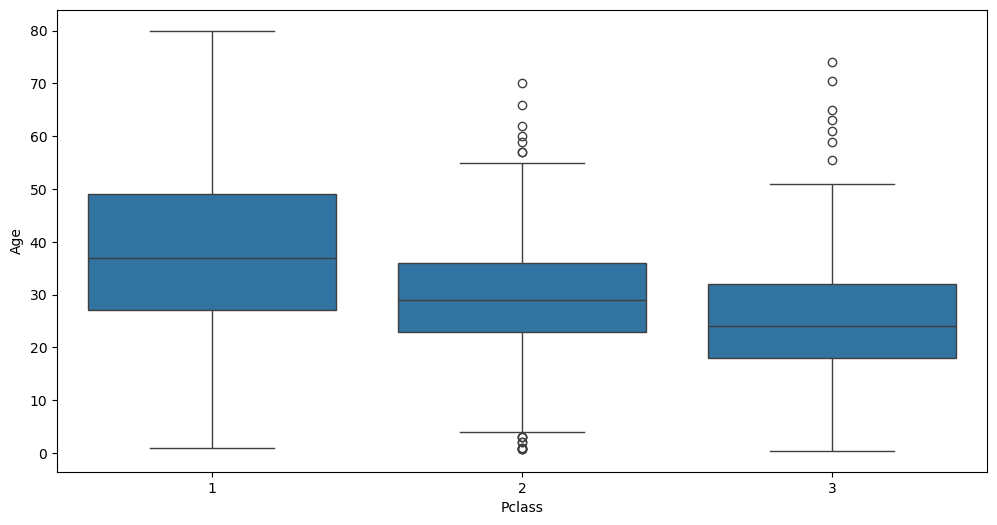

In [16]:
plt.figure(figsize= (12,6))
sns.boxplot(x= 'Pclass',y='Age',data = df)

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass ==  1:
            return 37
        elif Pclass == 2:
            return 28
        elif Pclass == 3:
            return 24
    else :
        return Age

In [18]:
df['Age']= df[['Age','Pclass']].apply(impute_age,axis=1)

/var/folders/kt/w6twmgs133zbbhs2_ktq4jc80000gn/T/ipykernel_1593/213553204.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/var/folders/kt/w6twmgs133zbbhs2_ktq4jc80000gn/T/ipykernel_1593/213553204.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df.drop('Cabin',axis = 1,inplace = True)



In [21]:
df.dropna(inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [23]:
#converting categorical columns

In [24]:
Sex=pd.get_dummies(df['Sex'],drop_first=True,dtype = int)
Embarked = pd.get_dummies(df['Embarked'],drop_first=True,dtype = int)

In [25]:
df.drop(['Sex','Embarked','Name','Ticket'],axis = 1,inplace= True)

In [26]:
df['Sex'] = Sex

In [27]:
df = pd.concat([df,Embarked],axis = 1)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [29]:
#building a Logistic Regression Model

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop('Survived',axis = 1)
y = df['Survived']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lg = LogisticRegression()

In [35]:
lg.fit(X_train,y_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
pred = lg.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.81      0.63      0.71       104

    accuracy                           0.80       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267



In [39]:
print(confusion_matrix(y_test,pred))

[[148  15]
 [ 38  66]]


In [40]:
#to perform decision tree, random forests and Xgboost

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt = DecisionTreeClassifier()

In [44]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
pred = dt.predict(X_test)

In [47]:
print(confusion_matrix(y_test,pred))

[[131  32]
 [ 33  71]]


In [48]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       163
           1       0.69      0.68      0.69       104

    accuracy                           0.76       267
   macro avg       0.74      0.74      0.74       267
weighted avg       0.76      0.76      0.76       267



In [49]:
#Randomforests

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf = RandomForestClassifier()

In [52]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
pred = rf.predict(X_test)

In [54]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       163
           1       0.84      0.74      0.79       104

    accuracy                           0.84       267
   macro avg       0.84      0.82      0.83       267
weighted avg       0.84      0.84      0.84       267



In [55]:
print(confusion_matrix(y_test,pred))

[[148  15]
 [ 27  77]]


In [57]:
from xgboost import XGBClassifier

In [78]:
xg = XGBClassifier(objective='binary:logistic',random_state = 101,eval_metric='logloss')

In [79]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [80]:
pred = xg.predict(X_test)

In [81]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       163
           1       0.77      0.69      0.73       104

    accuracy                           0.80       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.80      0.80      0.80       267



In [82]:
print(confusion_matrix(y_test,pred))

[[142  21]
 [ 32  72]]


In [77]:
#from the above models we see that Random forest classifiers has made the best prediction 
#recall : the measure of all actual positive instances that the model has correctly identified as positive
#The recall in the Random forest for survived(1) is better than the other models
#the overall accuracy of the Random forest model is also the best among the other models
